# Position Calculator of Laser (P.C.L.)
Designed by Hao Wang $$ $$
Version 3.7 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [ ]:
import time
import cv2 # pip install opencv-python
import os
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pylab
import pandas as pd
import numpy as np
import IPython.display as ipd
from datetime import datetime
import imageio
import scipy.ndimage as ndi

In [ ]:
def array_to_html(arr, row_names=None, col_names=None, title=None):
    ''' array_to_html, if placed at the end of a Anaconda cell, will
        display the array in html.   It uses pandas.
    '''
    if len(arr.shape) not in [1, 2]:
        print('The array must be a one- or two-dimensional array. This array is',
             len(arr.shape), 'dimensions')
        return

    if title:
        ipd.display(ipd.HTML('<h1>' + title + '</h1>'))
    df = pd.DataFrame(arr, index=row_names, columns=col_names)
    return ipd.display(ipd.HTML(df.to_html()))

# Analyze video

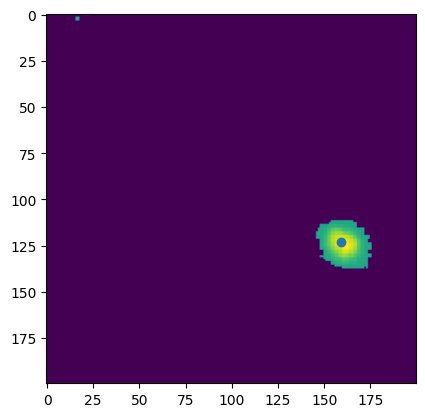

In [ ]:
import pylab
import imageio
import scipy.ndimage as ndi
filename = '/content/5ml per min_20220321_15_45_01_Pro.mp4'
vid = imageio.get_reader(filename,  'ffmpeg')
image=vid.get_data(0)
x = image[300:500,800:1000,0] # find range
    #print(type(x))
x[x<150] = 0 # test this number to find desired location

cy, cx = ndi.center_of_mass(x)
plt.imshow(x)
plt.scatter(cx,cy)


In [ ]:
# analysis video data
import pylab
import imageio
import scipy.ndimage as ndi
import imageio.v3 as iio
filename = '/content/5ml per min_20220321_15_45_01_Pro.mp4'# change file path + name here
fps = iio.immeta(filename)["fps"]
vid = imageio.get_reader(filename,  'ffmpeg')
result = []
nums = [10, 287]
total_second = 15
lengt = int(fps*total_second) # analysis 15s of video
# loop through all frames
for i in np.arange(0,lengt):
    image = vid.get_data(i)
    x = image[300:500,800:1000,0] # change based on example
    
    #print(type(x))
    x[x<150] = 0 # change threshold
    cy, cx = ndi.center_of_mass(x)
   
    result.append(cy)
    if(i%100==0):
        print(i/lengt*100,'% finished')
result=np.array(result)
result=result-result[0]


0.0 % finished
22.22222222222222 % finished
44.44444444444444 % finished
66.66666666666666 % finished
88.88888888888889 % finished


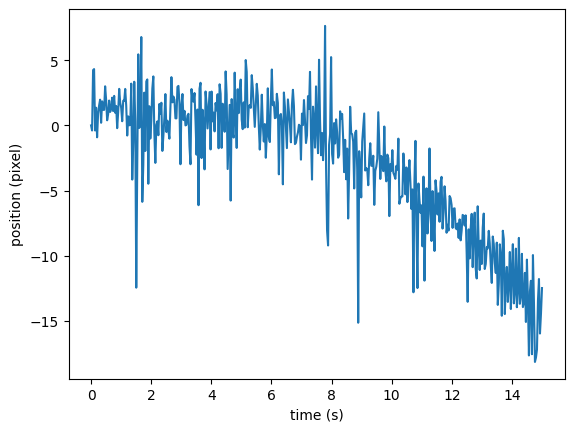

In [ ]:
time_space = np.linspace(0, total_second, num=int(total_second*fps))
plt.plot(time_space,result)
plt.xlabel('time (s)')
plt.ylabel('position (pixel)')
plt.show()

In [ ]:
np.savetxt("moving.csv", result, delimiter=",")